#### Objective : Predict the average price of an avacado

# Importing the Packages and DataSet


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the avacado 
avacado = pd.read_csv("Avacado.csv")

In [3]:
#display the first 5 records
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


- Identified the column name of first column to be unnamed, renamning it in the next step



In [4]:
#renmae the first column
avacado.rename(columns = {"Unnamed: 0" : "Sno"}, inplace = True)

In [5]:
#display all the column names
avacado.columns

Index(['Sno', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
#display the shape of avacado
avacado.shape

(16468, 14)

# Identify the types of problems(Regression/Classification)

In [7]:
avacado.dtypes

Sno             float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

#### considering average price column to be the target column:
   - Average Price column is continues in nature
   - The problem is supervised and regression algorithm will give the best result.
   
       ##### Supervised/Regression


# Exploratory Data Analysis and Data Cleaning

In [8]:
#checking fot null values
avacado.isnull().sum()

Sno             14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

###### The dataset has 14951 empty rows which should be removed for a better model prediction

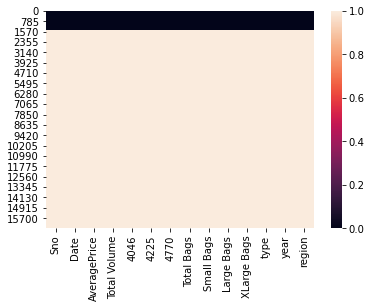

In [9]:
#ploting the data into heatmap to identify the null value
sns.heatmap(avacado.isnull())

##### There 1570 rows with values and the rest is null

In [10]:
#find the rows with no null values.
df_avacado = avacado[avacado.notnull().any(axis=1)]

In [11]:
#new dataframe
df_avacado.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [12]:
#check shape of dataframe
df_avacado.shape

(1517, 14)

In [63]:
#check column name 
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

### observations:
###### Product Lookup codes - PLU
 - Date - The date of the observation
 - AveragePrice - the average price of a single avocado
 - type - conventional or organic
 - year - the year
 - Region - the city or region of the observation
 - Total Volume - Total number of avocados sold
 - 4046 - Total number of avocados with PLU 4046 sold
 - 4225 - Total number of avocados with PLU 4225 sold
 - 4770 - Total number of avocados with PLU 4770 sold


##### There are 1517 rows and 14 columns

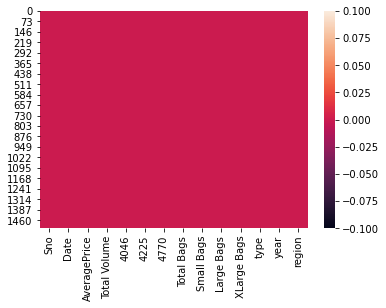

In [13]:
# plot the heat map to check if thre are any more null values
sns.heatmap(df_avacado.isnull())

##### There are no null values

In [14]:
#exammining the first five records
df_avacado.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


#### observation:
   - The "Sno" column seems to have unique pattern further analysis done to know the importance of Sno column with the dataset

In [15]:
#changing the type of sno to be int as it is a float in nature
df_avacado["Sno"].astype(int)

0        0
1        1
2        2
3        3
4        4
        ..
1512    10
1513    11
1514    12
1515    13
1516    14
Name: Sno, Length: 1517, dtype: int32

In [16]:

df_avacado["Sno"]= df_avacado["Sno"].astype(int)

In [17]:
#checking the first five records
df_avacado.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [18]:
#finding the unique values of Sno column
df_avacado["Sno"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

#### Observations:
   - There are 52 numbers and 1517 row, which indicates the repetition of serial number.
   - Dropping this column to make the process of prediction easier 

In [19]:
# drop the Sno column
df_avacado = df_avacado.drop("Sno", axis = 1)

In [20]:
# display Date column unique values
df_avacado["Date"].unique()

array(['27-12-2015', '20-12-2015', '13-12-2015', '06-12-2015',
       '29-11-2015', '22-11-2015', '15-11-2015', '08-11-2015',
       '01-11-2015', '25-10-2015', '18-10-2015', '11-10-2015',
       '04-10-2015', '27-09-2015', '20-09-2015', '13-09-2015',
       '06-09-2015', '30-08-2015', '23-08-2015', '16-08-2015',
       '09-08-2015', '02-08-2015', '26-07-2015', '19-07-2015',
       '12-07-2015', '05-07-2015', '28-06-2015', '21-06-2015',
       '14-06-2015', '07-06-2015', '31-05-2015', '24-05-2015',
       '17-05-2015', '10-05-2015', '03-05-2015', '26-04-2015',
       '19-04-2015', '12-04-2015', '05-04-2015', '29-03-2015',
       '22-03-2015', '15-03-2015', '08-03-2015', '01-03-2015',
       '22-02-2015', '15-02-2015', '08-02-2015', '01-02-2015',
       '25-01-2015', '18-01-2015', '11-01-2015', '04-01-2015',
       '25-12-2016', '18-12-2016', '11-12-2016', '04-12-2016',
       '27-11-2016', '20-11-2016', '13-11-2016', '06-11-2016',
       '30-10-2016', '23-10-2016', '16-10-2016', '09-10

- There are many unique dates values

In [21]:
#check the unique values for regions
df_avacado["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [22]:
# Find the value count of region
df_avacado["region"].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [23]:
#display the unique value of type
df_avacado["type"].unique()

array(['conventional'], dtype=object)

In [24]:
#display the unique value of year
df_avacado["year"].unique()

array([2015., 2016.])

#### converting all the value into numeric type

In [25]:
# calculate the datatypes 
df_avacado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

##### There are 3 columns of object type and the rest of numeric/float type
   - The Date column should DateTime type(can be changed using astype)
   - The Type column is type object(can be changed using Label Encoding)
   - The region column is type object(can be changed using Label Encoding)

In [26]:
# The date column is change to datetime64[ns] type
df_avacado["Date"] = df_avacado["Date"].astype('datetime64[ns]')

In [27]:
#checking the type of data in each column
df_avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

- The date column is in datetime format

In [30]:
#drop the year column 
df_avacado = df_avacado.drop("year", axis = 1)

#### observation :
   - The date column contians year, date and month values in it.
   - So,Dropping the year will column will have smaller impact on the prediction

In [31]:
#checcking for the type of columns
df_avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
dtype: object

In [32]:
#checking the column names 
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

- The "year" and "Sno" are removed from the dataset

In [33]:
#check the first 5 rowsa
df_avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [34]:
#check the shape of the dataset
df_avacado.shape

(1517, 12)

In [37]:
#check the information 
df_avacado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 154.1+ KB


In [35]:
#describe the dataset
df_avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


### Observation:
   - The dataset has 12 columns and a count of 1517 records.
   - There is skewness in thw dataset,becuase of the big difference in mean and standard deviation.
   - The difference between min and max values is greater in some columns. Hence, scaling can be used.
  ###### Avergae price - target column 
  
    -  No big difference between and standard deviation
    -  The difference betwen minimum and maximum range is less.
    
    

##### Univariate Analysis

Text(0.5, 1.0, 'Avacado sales count in different Regions')

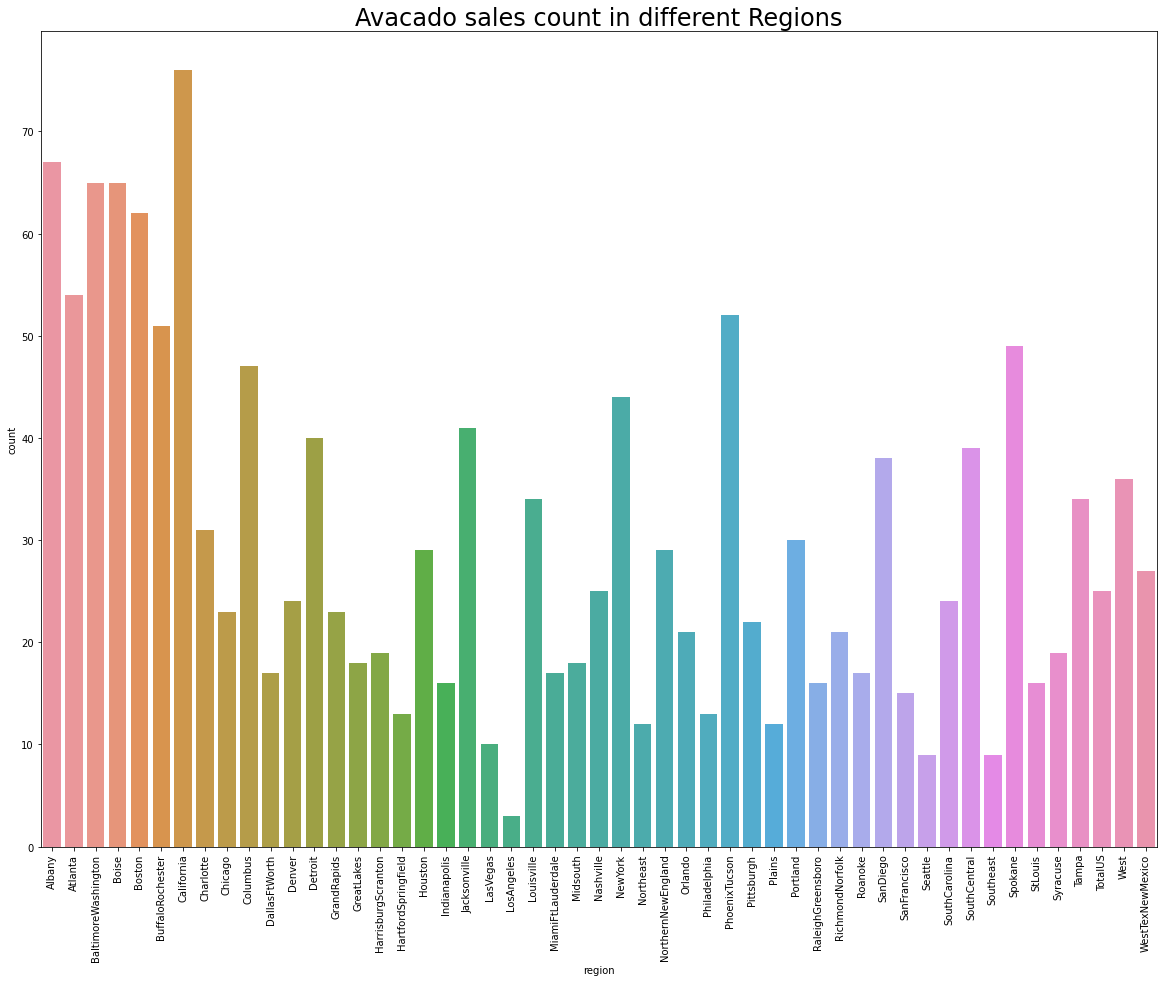

In [43]:
#count plot for categorical variable region
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df_avacado, x="region")
plt.xticks(rotation=90)
plt.title("Avacado sales count in different Regions", fontsize = 24)

### Observation:
  -  The cities California seems to have the highest count of avacado sales.

In [45]:
# grouping region and price 
group_AP_Region = pd.DataFrame({"AP_mean" : df_avacado.groupby("region")["AveragePrice"].mean()}).reset_index()

In [46]:
group_AP_Region.sort_values(by="AP_mean",ascending = False)

,region,AP_mean
46,Syracuse,1.347368
7,Charlotte,1.311613
5,BuffaloRochester,1.301569
30,Philadelphia,1.293846
45,StLouis,1.260000
26,NewYork,1.248636
0,Albany,1.238657
27,Northeast,1.236667
8,Chicago,1.214783
16,HartfordSpringfield,1.209231


- The average price seems to vary between regions by 0.1 to 0.3 cents.

# Bivariate

Text(0.5, 1.0, 'Region Vs Price')

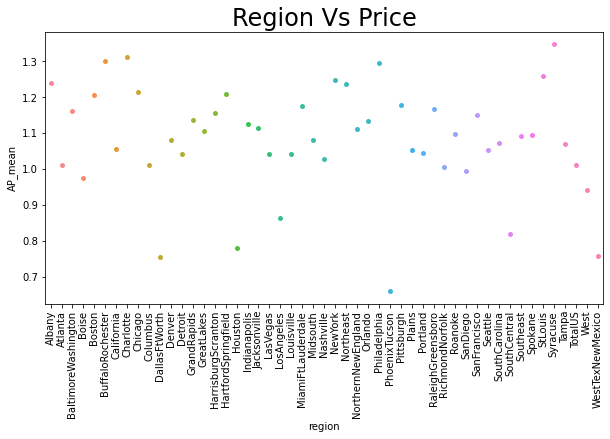

In [53]:
#plot region and mean of average price
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x = "region", y="AP_mean", data = group_AP_Region, size= 5)
plt.xticks(rotation=90)
plt.title("Region Vs Price", fontsize=24)

### observations:
- The swarm plot suggest a similar pattern of pricing between few regions

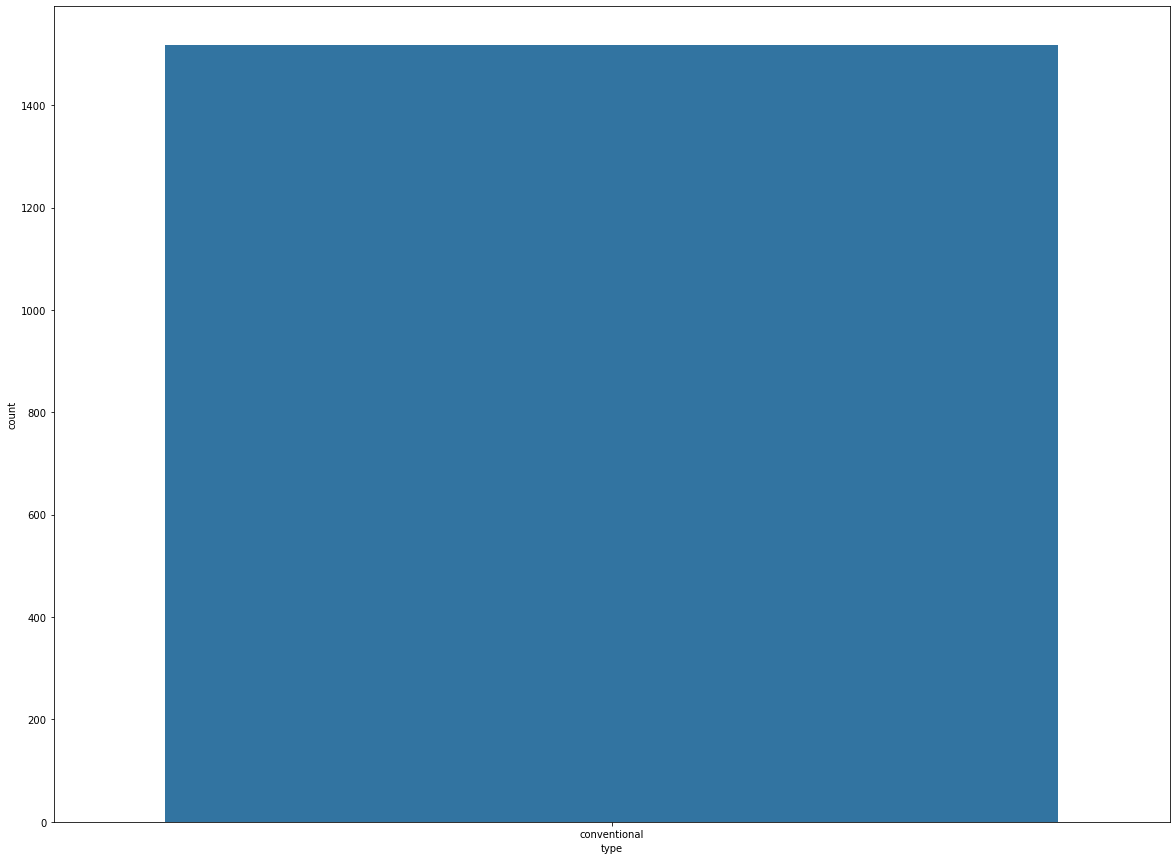

In [54]:
#univariate
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df_avacado, x="type")


In [55]:
#group the values of date and price
group_AP_date = pd.DataFrame({"AP_mean_date" : df_avacado.groupby("Date")["AveragePrice"].mean()}).reset_index()

In [56]:
group_AP_date

,Date,AP_mean_date
0,2015-01-02,0.950833
1,2015-01-03,1.044333
2,2015-01-11,1.023182
3,2015-01-18,1.108571
4,2015-01-25,1.080455
...,...,...
99,2016-11-20,1.456667
100,2016-11-27,1.418333
101,2016-12-06,1.197500
102,2016-12-18,1.198333


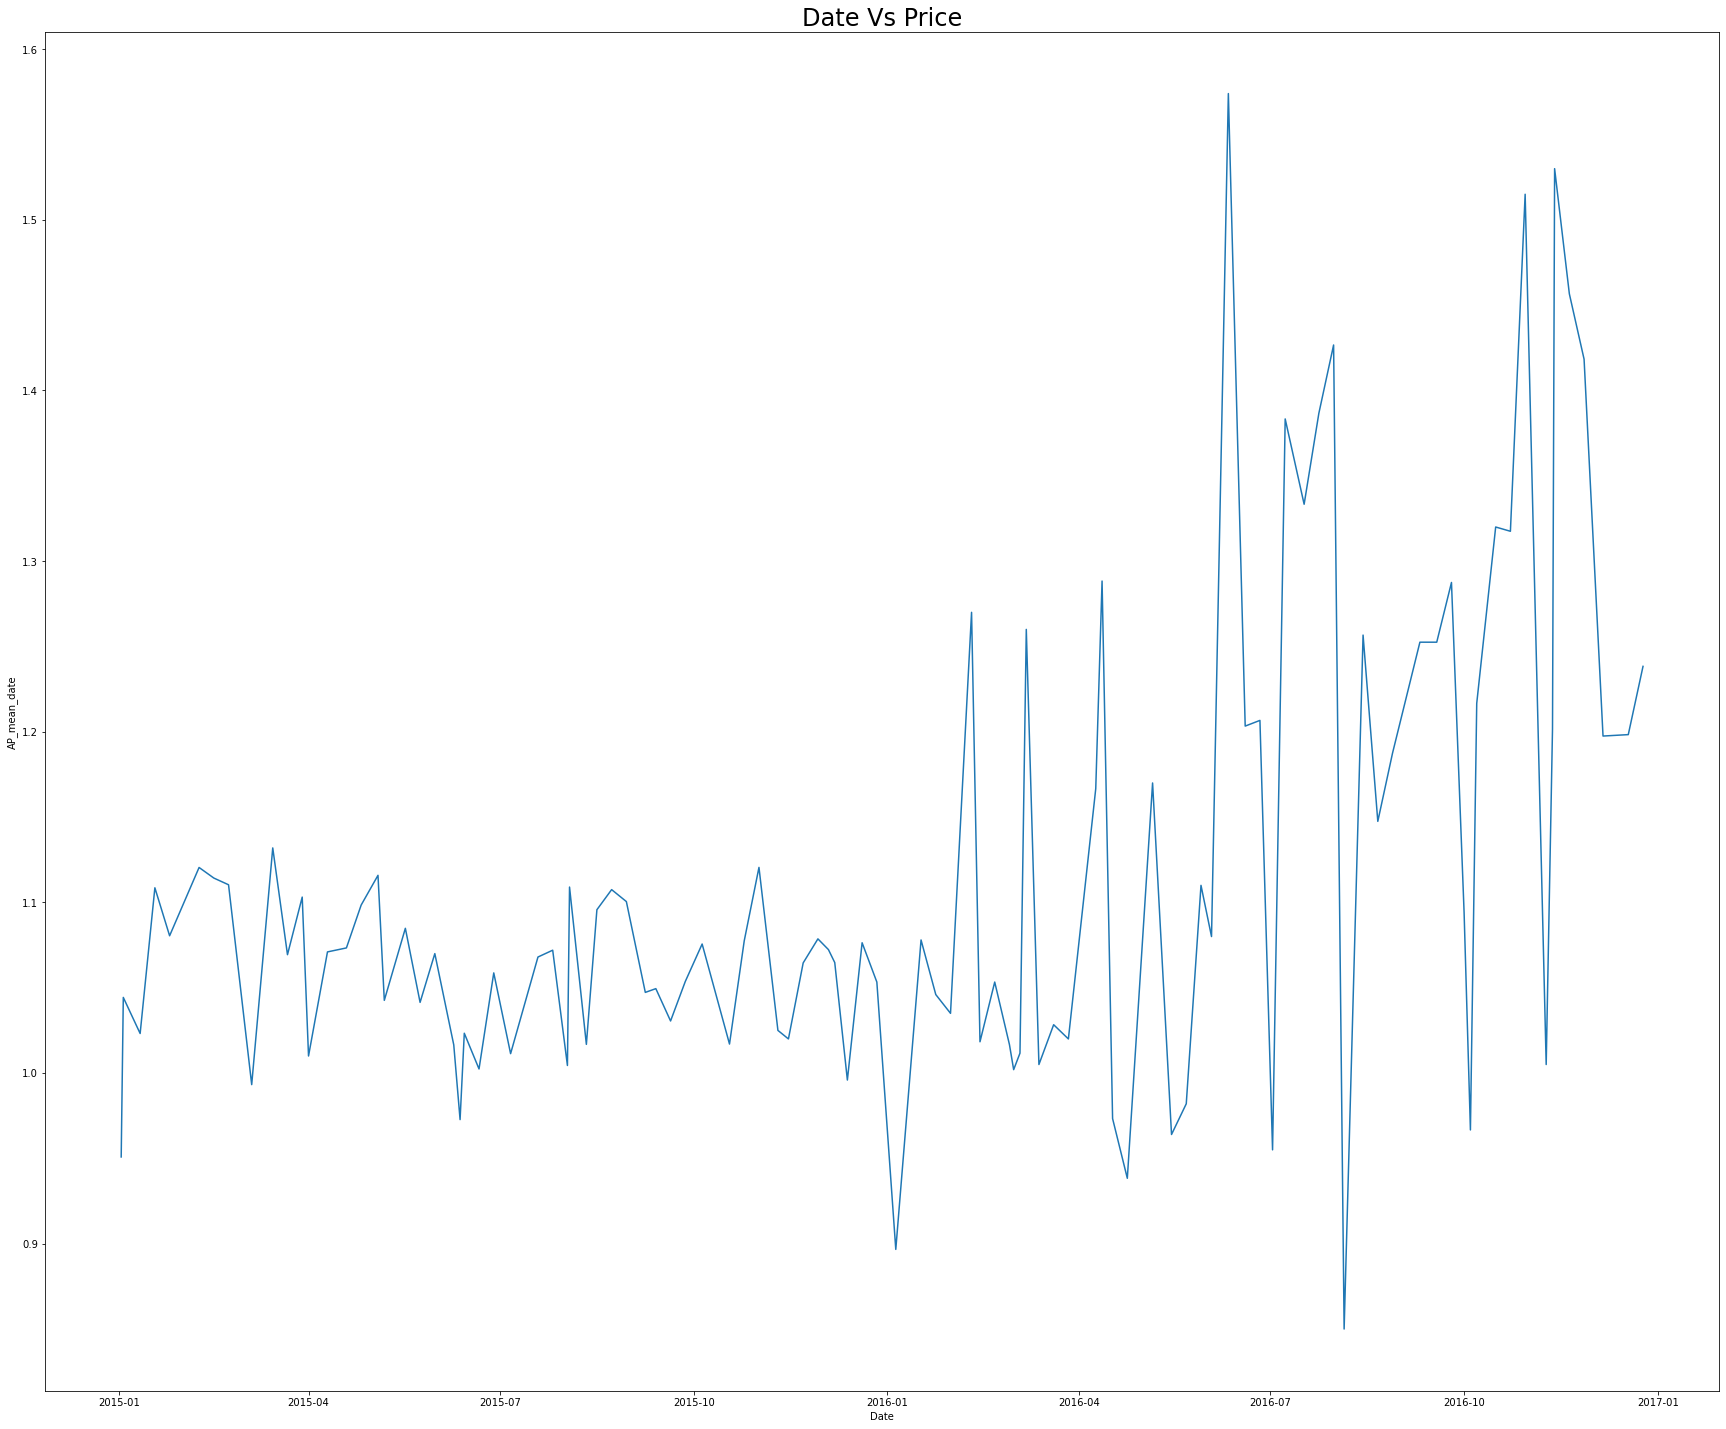

In [59]:
#plot average price and date 
fig_size = (30,25)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Date Vs Price", fontsize=24)
sns.lineplot(x="Date", y="AP_mean_date", data = group_AP_date )

### observations

 - The timeline indicate a trend that indicates that price of an avacado increase and decrese with smaaller difference. The entire timeline showcase  the increased trend of price over the years(2015-2016).
 - In the year 2016-07 to 2016-10 there as been a sharp decrease in price.
 - Overall, observation there is an increase in the price 

In [60]:
group_AP_date

,Date,AP_mean_date
0,2015-01-02,0.950833
1,2015-01-03,1.044333
2,2015-01-11,1.023182
3,2015-01-18,1.108571
4,2015-01-25,1.080455
...,...,...
99,2016-11-20,1.456667
100,2016-11-27,1.418333
101,2016-12-06,1.197500
102,2016-12-18,1.198333


In [61]:
group_AP_date.isnull().sum()


Date            0
AP_mean_date    0
dtype: int64

In [62]:
group_AP_date.dtypes

Date            datetime64[ns]
AP_mean_date           float64
dtype: object

In [70]:
#The values for group variet
group_date_4046 = pd.DataFrame({"AP_median_4046" : df_avacado.groupby("Date")["4046"].median()}).reset_index()
group_date_4225 = pd.DataFrame({"AP_median_4225" : df_avacado.groupby("Date")["4225"].median()}).reset_index()
group_date_4770 = pd.DataFrame({"AP_median_4770" : df_avacado.groupby("Date")["4770"].median()}).reset_index()

In [71]:
group_date_4046

,Date,AP_median_4046
0,2015-01-02,213804.565
1,2015-01-03,93288.320
2,2015-01-11,85141.675
3,2015-01-18,107566.950
4,2015-01-25,120930.560
...,...,...
99,2016-11-20,18376.110
100,2016-11-27,14008.870
101,2016-12-06,43256.025
102,2016-12-18,17424.610


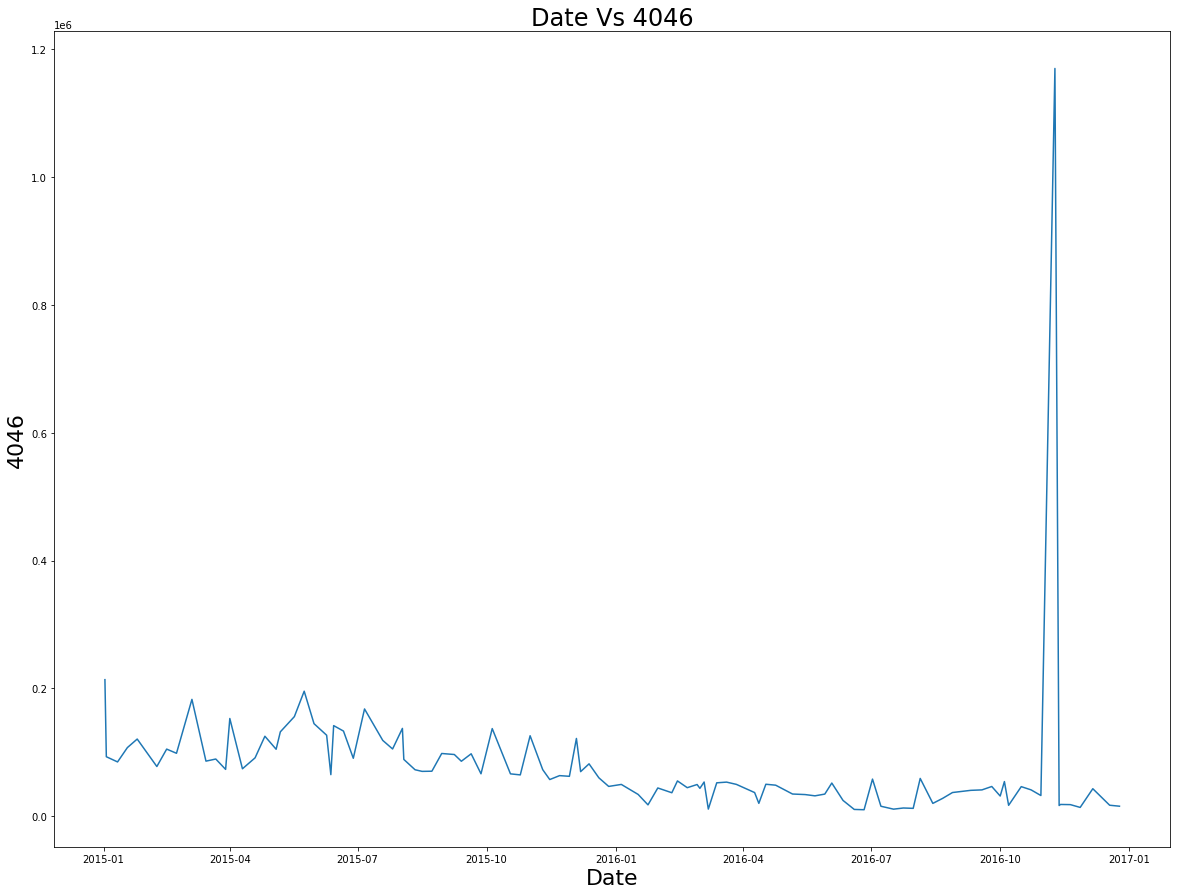

In [73]:
# plot for 4046 and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('4046', fontsize = 22)
plt.title("Date Vs 4046", fontsize=24)
sns.lineplot(x="Date", y="AP_median_4046", data = group_date_4046 )

### observation:
- The product Lookup code 4046 shows a trend where the sold quantity is within (10^6*0.2 = 200000).
- Except for the timeline between 2016-10 and 2016-11 there is sharp increase in the sold quantity for 4046 (10^6*1.0 = 1000000)
- overall observation, there is steady purchase rate for PLU 4046 avacado

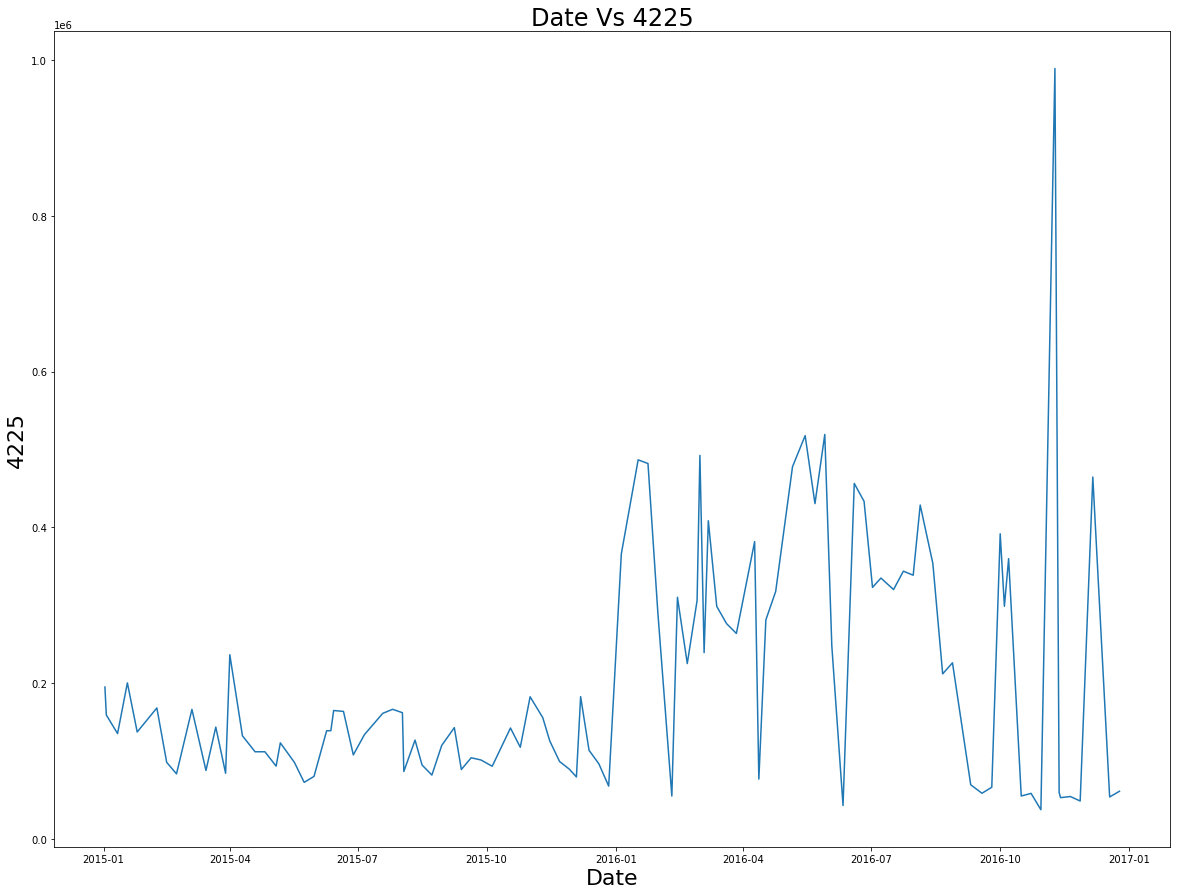

In [75]:
#plot for 4225 and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('4225', fontsize = 22)
plt.title("Date Vs 4225", fontsize=24)
sns.lineplot(x="Date", y="AP_median_4225", data = group_date_4225 )

    

### observation:
- The product Lookup code 4225 shows a trend where the sold quantity was within 250000, till 2016-01.
- Except for the timeline between 2016-01 and 2016-10  there is sharp increase in the sold quantity as well as a sharp decrease in for 4225 
- overall observation, there is purchase rate of mixture with rising wedge and fallig wedge for PLU 4225 avacado

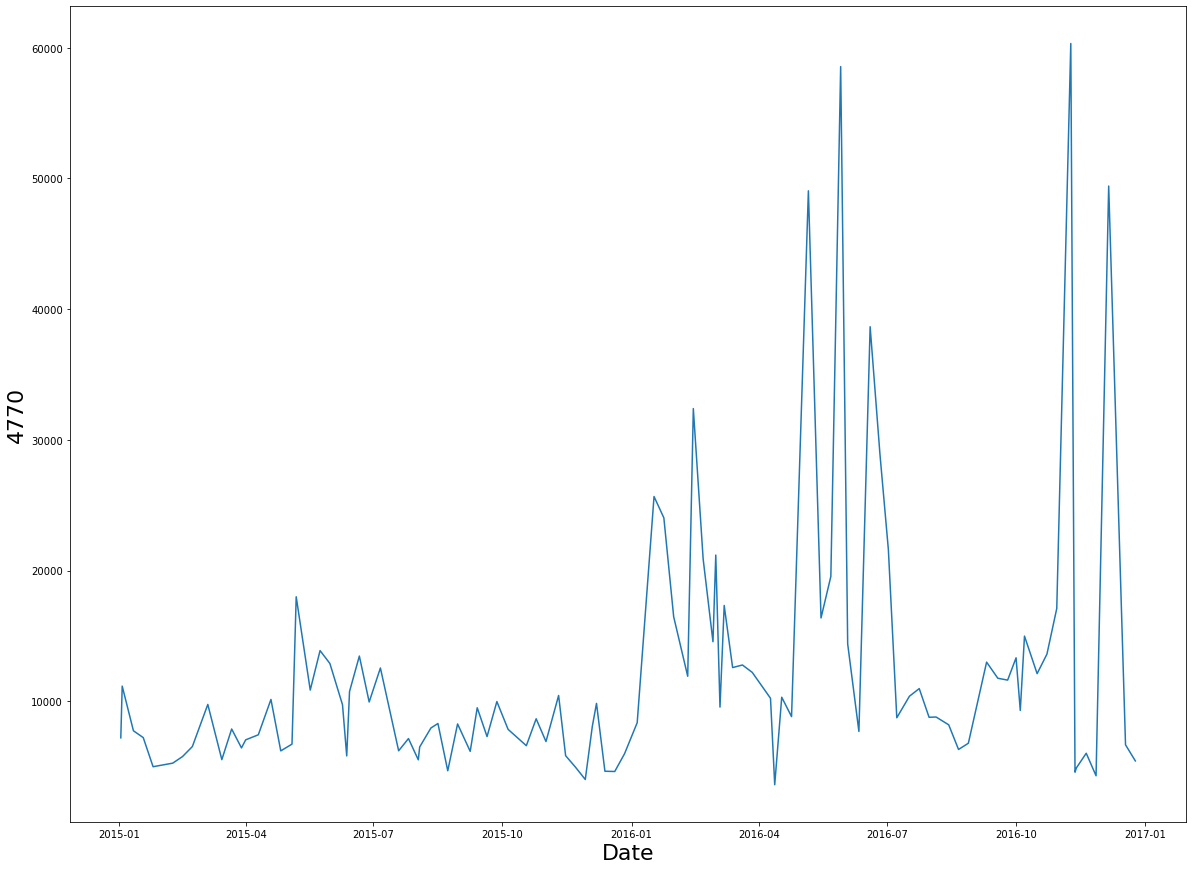

In [76]:
#plot for 4770 and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('4770', fontsize = 22)
sns.lineplot(x="Date", y="AP_median_4770", data = group_date_4770)

### observation:
- The product Lookup code 4770 shows a trend where the sold quantity was within 250000, till 2016-01.
- Except for the timeline between 2016-01 and 2016-10  there is sharp increase in the sold quantity with very little falling wedge  
- overall observation, there is purchase rate of avacado for PLU 4770 mostly of rising wedge and little of fallig wedge 

In [77]:
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [78]:
#finding trends in bag sizes purchased 
tot_bag =  pd.DataFrame({"mean_total" : df_avacado.groupby("Date")["Total Bags"].mean()}).reset_index()
small_bag =  pd.DataFrame({"mean_small" : df_avacado.groupby("Date")["Small Bags"].mean()}).reset_index()
large_bag =  pd.DataFrame({"mean_large" : df_avacado.groupby("Date")["Large Bags"].mean()}).reset_index()
xlarge_bag =  pd.DataFrame({"mean_xlarge" : df_avacado.groupby("Date")["XLarge Bags"].mean()}).reset_index()

In [79]:
#first 5 records of total bags
tot_bag.head()

,Date,mean_total
0,2015-01-02,369198.334167
1,2015-01-03,302642.549667
2,2015-01-11,166112.889091
3,2015-01-18,359672.442857
4,2015-01-25,351330.100455


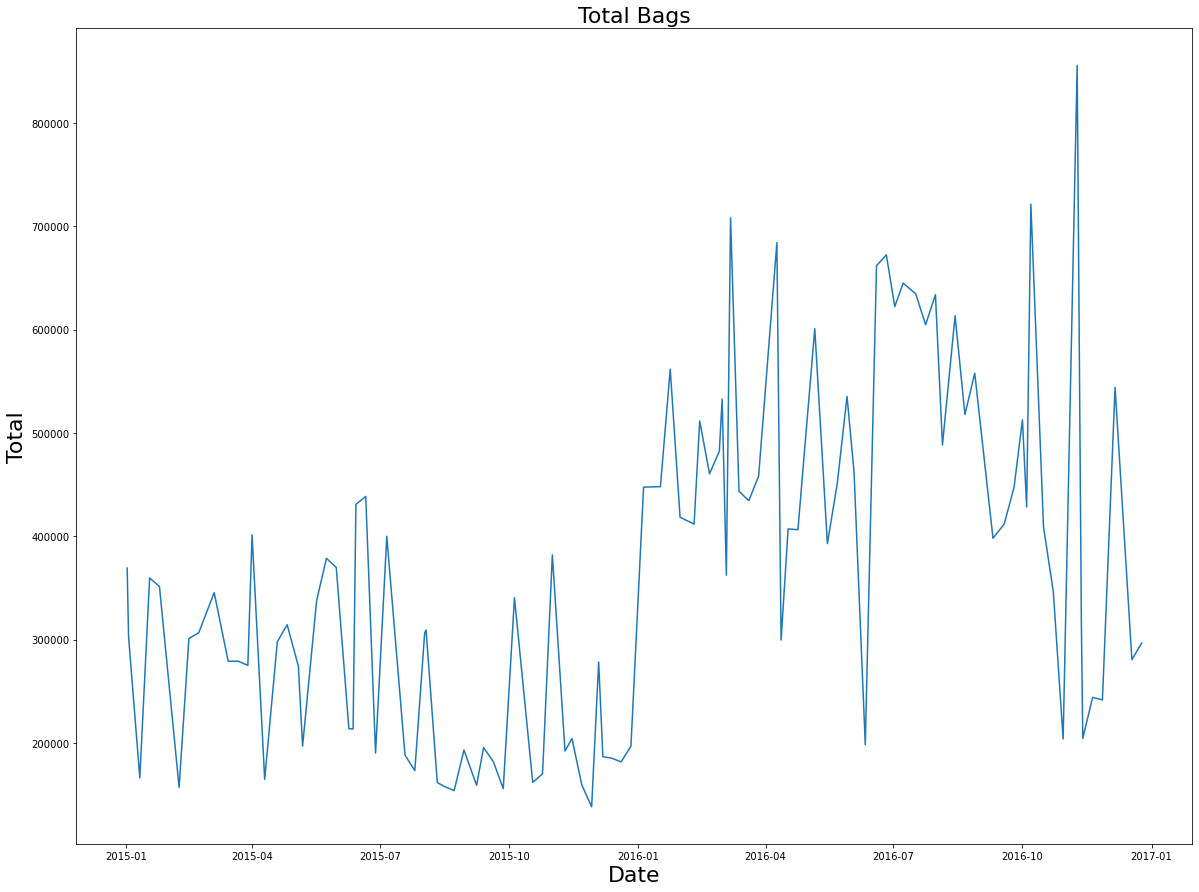

In [89]:
# plot for total bags and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Total', fontsize = 22)
plt.title("Total Bags", fontsize=22)
sns.lineplot(data = tot_bag, x="Date", y='mean_total',  ci=68)

### observation:
- An increase in the quanity of total bags purchased after 2016-01

In [98]:
#first 5 records of small bags
small_bag.head()

,Date,mean_small
0,2015-01-02,284210.400833
1,2015-01-03,250176.751000
2,2015-01-11,124483.563636
3,2015-01-18,297050.695714
4,2015-01-25,290110.485000


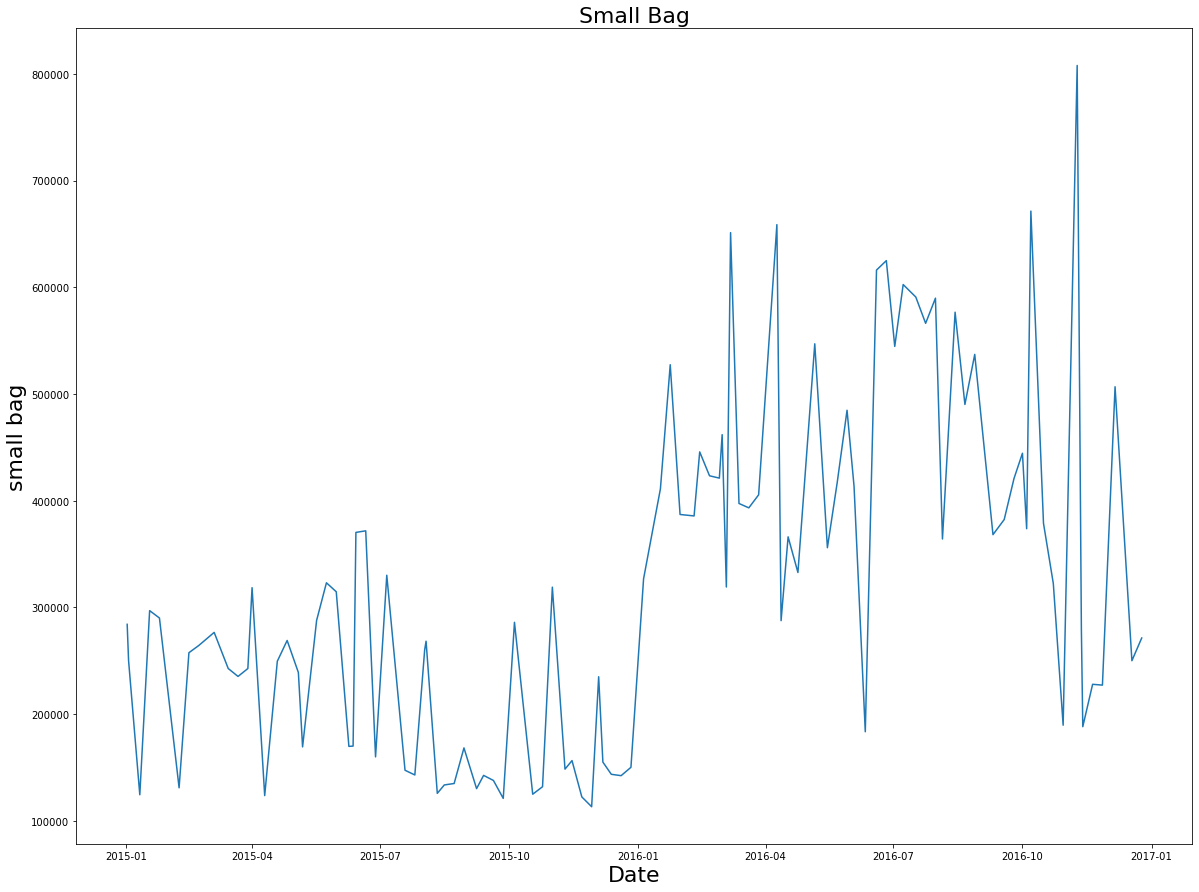

In [99]:
#plot for small bags and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('small bag', fontsize = 22)
plt.title("Small Bag", fontsize=22)
sns.lineplot(data = small_bag, x="Date", y='mean_small', ci=68)

### observation:
- An increase in the quanity of total small bags purchased after 2016-01

In [100]:
#first 5 records of largebags
large_bag.head()

,Date,mean_large
0,2015-01-02,82855.929167
1,2015-01-03,48713.552000
2,2015-01-11,40331.143636
3,2015-01-18,62052.510952
4,2015-01-25,60767.523182


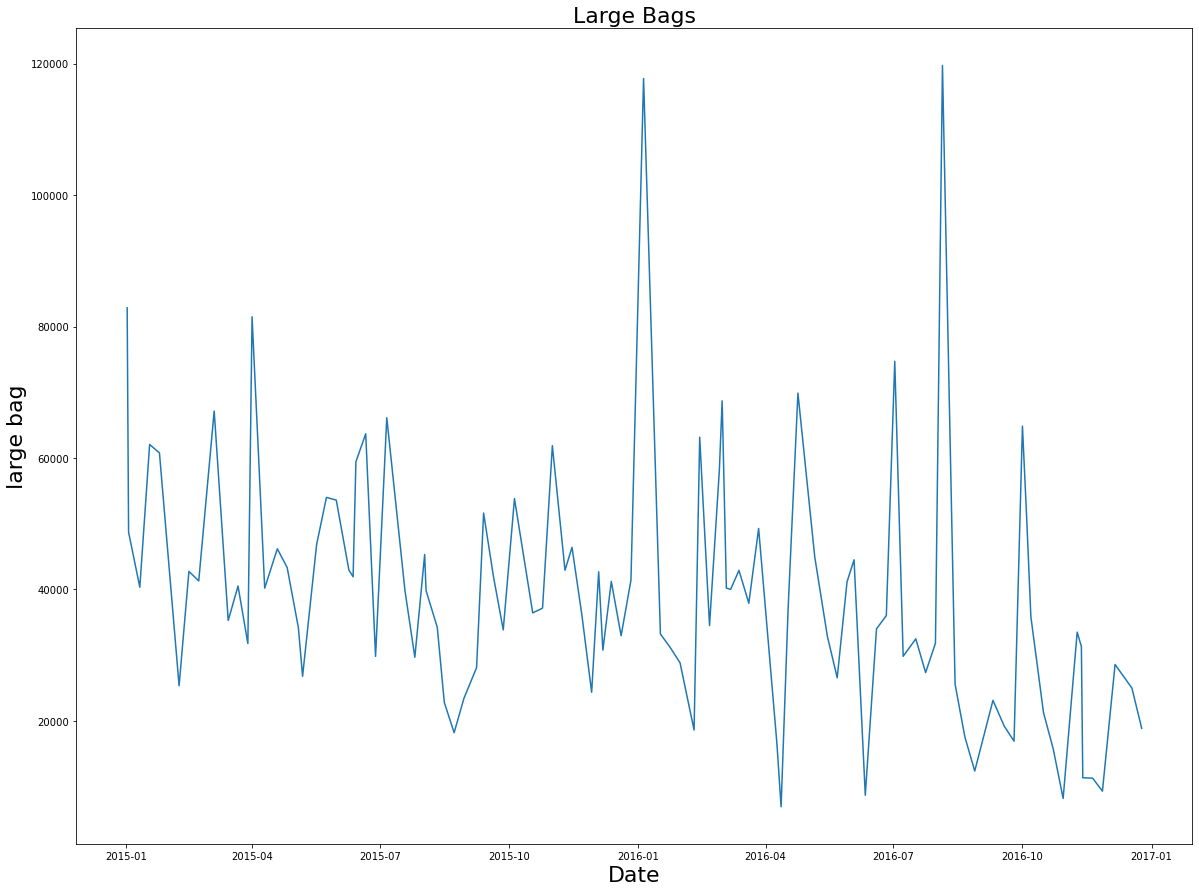

In [101]:
#plot for large bags and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('large bag', fontsize = 22)
plt.title("Large Bags", fontsize = 22)
sns.lineplot(data = large_bag, x="Date", y='mean_large', ci=68)

### observation:
- A slight decrease in the quanity of total large bags purchased after 2016-01

In [102]:
#first five records of xlarge bags
xlarge_bag.head()

,Date,mean_xlarge
0,2015-01-02,2132.004167
1,2015-01-03,3752.246667
2,2015-01-11,1298.181818
3,2015-01-18,569.236190
4,2015-01-25,452.092273


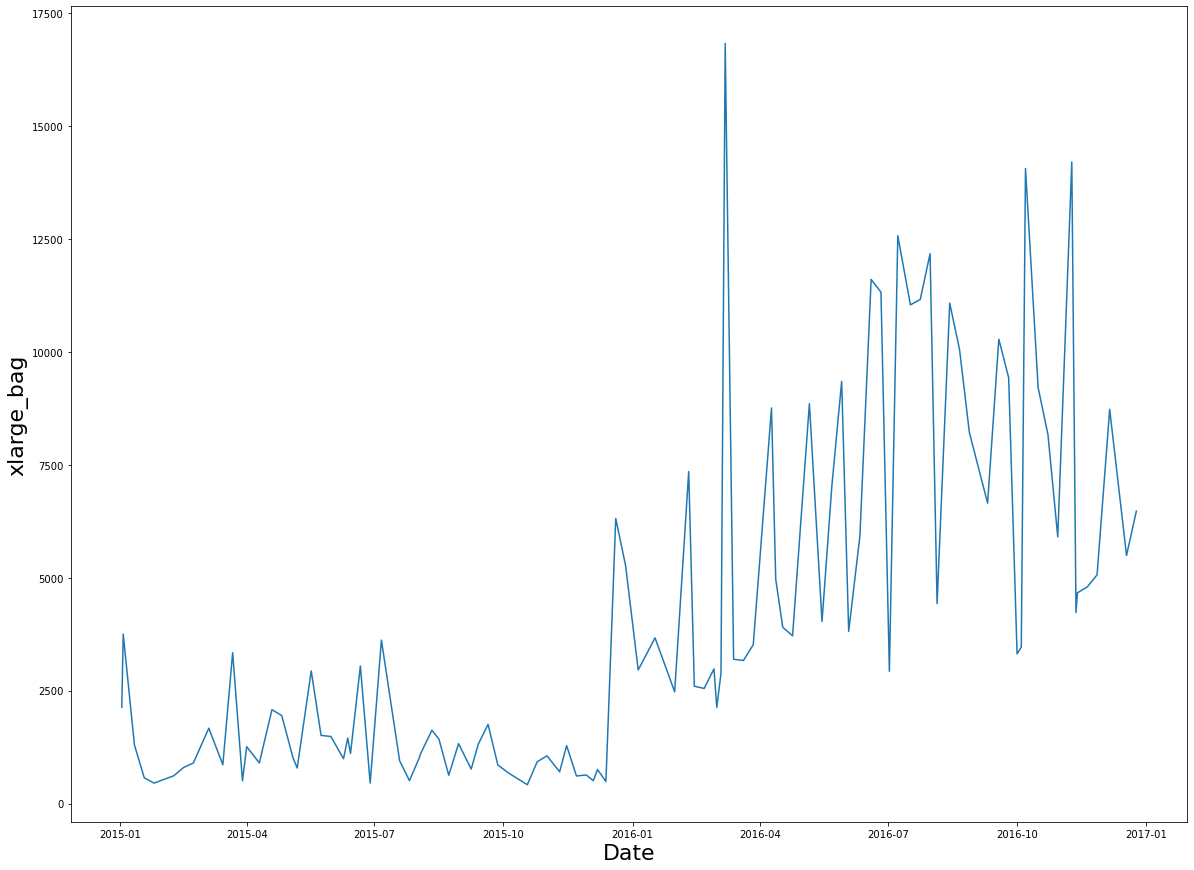

In [103]:
#plot for xlarge bags and date
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('xlarge_bag', fontsize = 22)
sns.lineplot(data = xlarge_bag, x="Date", y='mean_xlarge', ci=68)

### Observations:

- There is a sharp increase in the quantity of xlarge bags purchased after 2016-01

In [104]:
#check the columns for avacado dataset
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

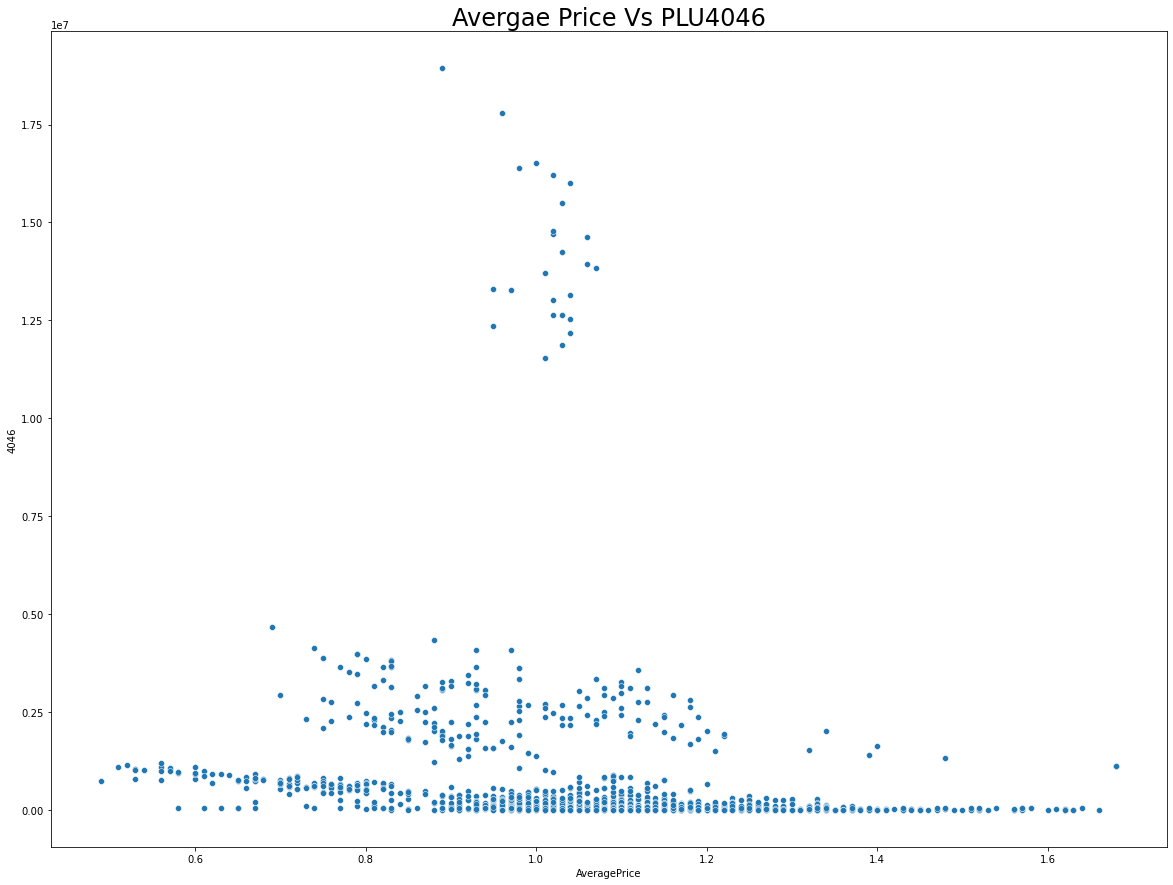

In [108]:
# plot to find the relationship between price and PLU4046
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Avergae Price Vs PLU4046", fontsize=24)
sns.scatterplot(x="AveragePrice", y="4046", data=df_avacado)

### observation:
- The average price per avacado for PLU4046 sold is spread across the range of avergae price
- Where as the rate of 4046 sold majorly lie within 2500000
- 4046 will be a good dependant variable to predict average price. Further correlation analysis can prove this theory.

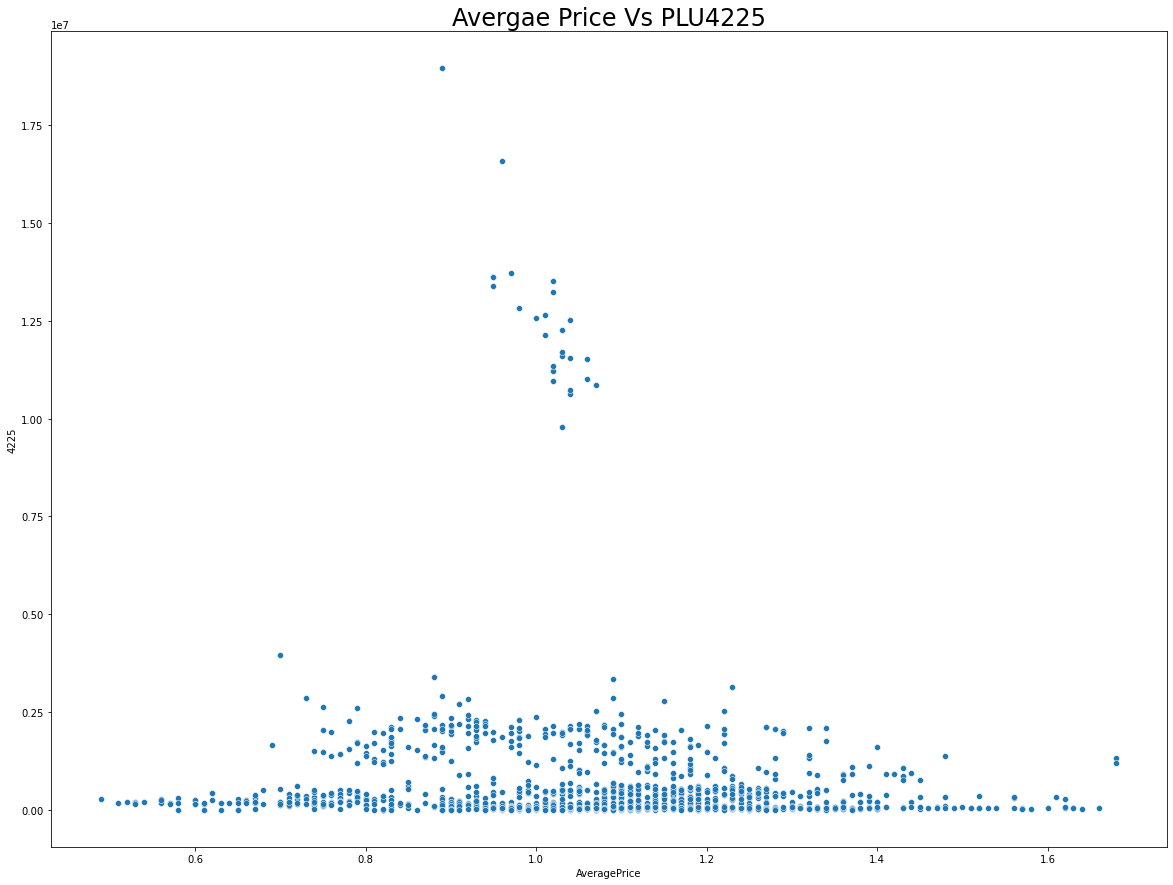

In [110]:
# plot to find the relationship between price and PLU4225
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Avergae Price Vs PLU4225", fontsize=24)
sns.scatterplot(x="AveragePrice", y="4225", data=df_avacado)

### observation:
- The average price per avacado for PLU4225 sold is spread across the range of avergae price
- Where as the rate of 4225 sold majorly lie within 2500000
- 4225 will be a good dependant variable to predict average price. Further correlation analysis can prove this theory.

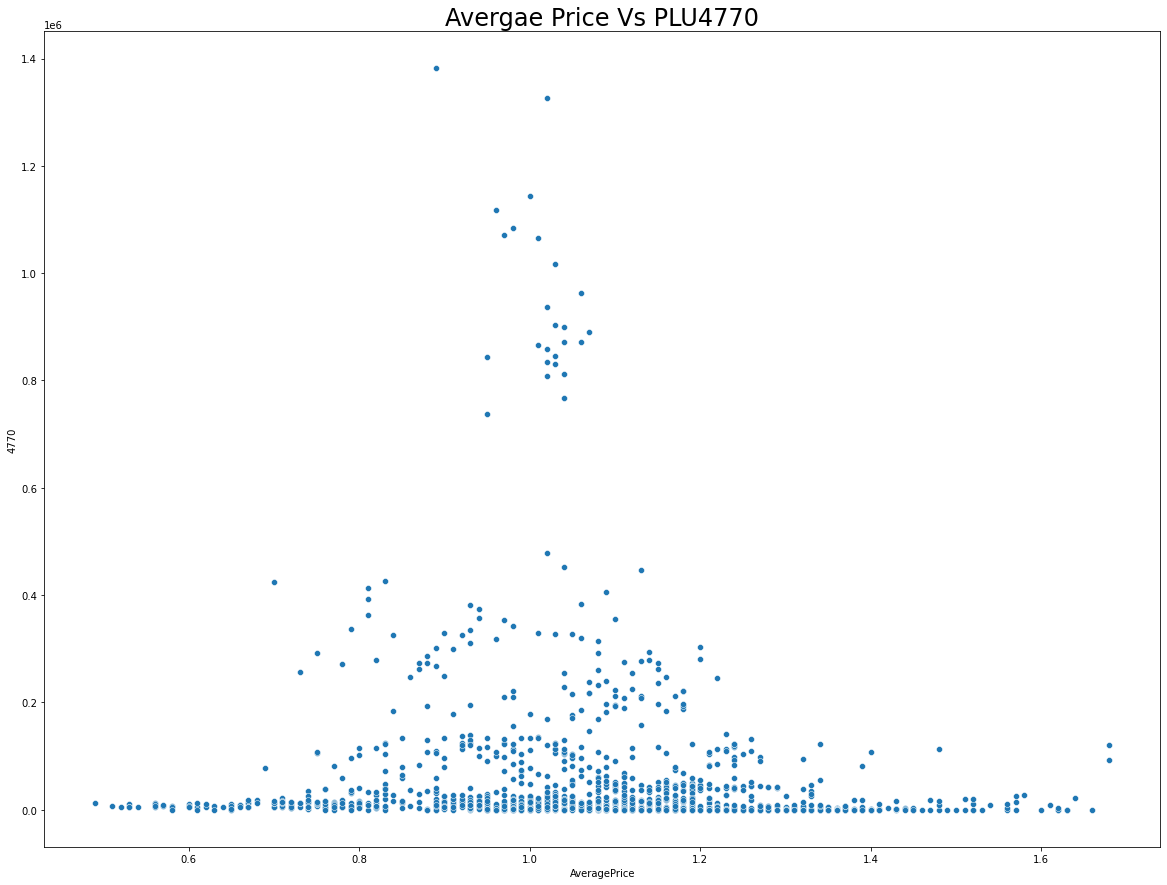

In [113]:
#plot to find relationship between Avergae price PLU4770
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Avergae Price Vs PLU4770", fontsize=24)
sns.scatterplot(x="AveragePrice", y="4770", data=df_avacado)

### observation:
- The average price per avacado for PLU4046 sold is spread across the range of avergae price
- Where as the rate of 4770 sold majorly lie within 2000000
- 4770 will be a good dependant variable to predict average price. Further correlation analysis can prove this theory.

In [114]:
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

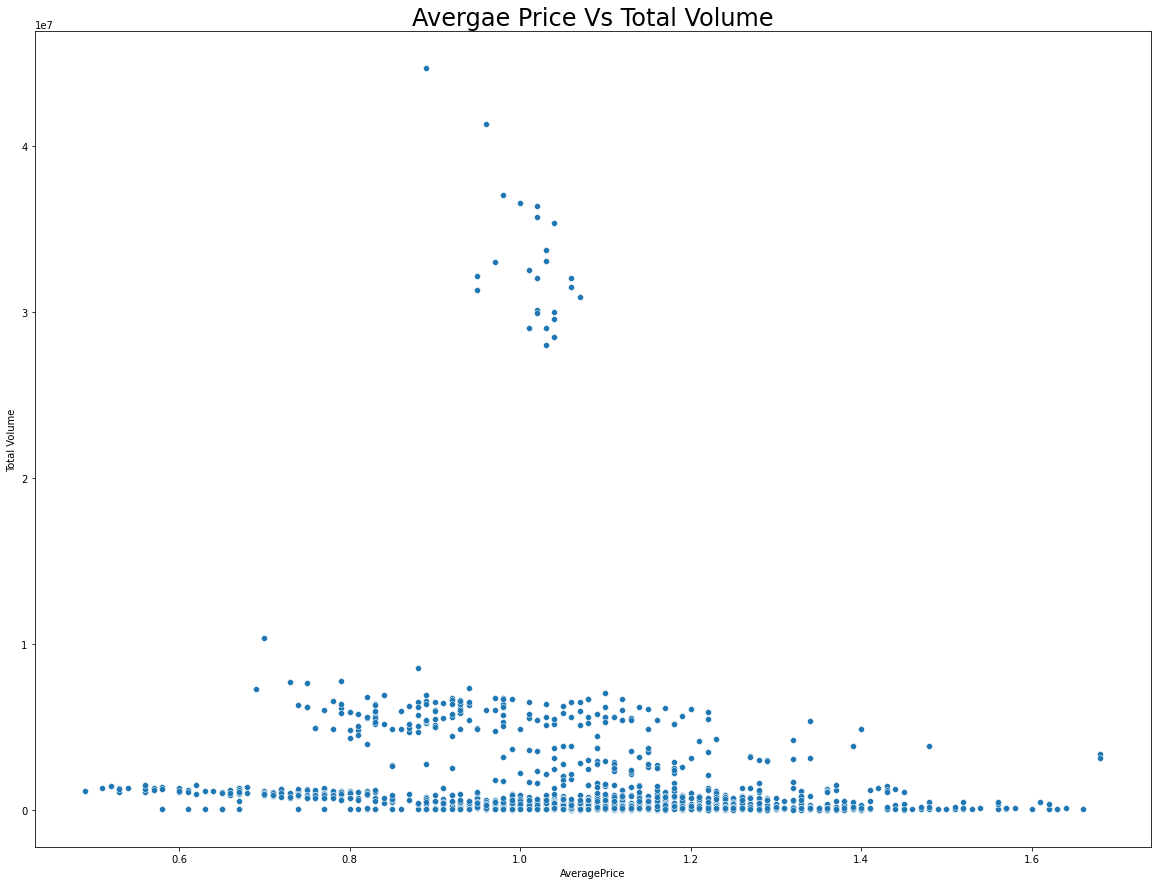

In [141]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Avergae Price Vs Total Volume", fontsize=24)
sns.scatterplot(x="AveragePrice", y="Total Volume", data=df_avacado)

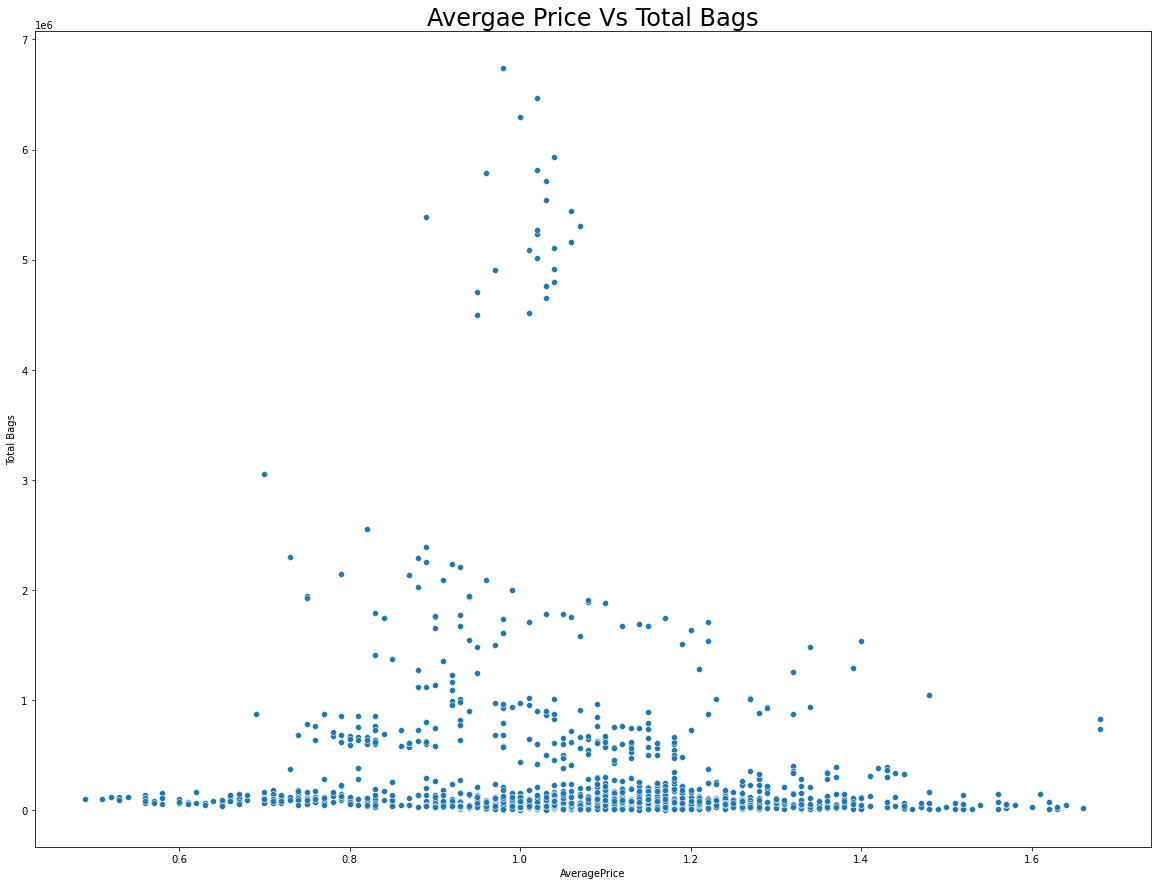

In [116]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Avergae Price Vs Total Bags", fontsize=24)
sns.scatterplot(x="AveragePrice", y="Total Bags", data=df_avacado)

### Multivariate Analysis

In [117]:
#sns.pairplot(df_avacado)

### observation:


### Label Encoding 

In [119]:
# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

# fit the categorical column
df_avacado["region"] = LE.fit_transform(df_avacado["region"])

In [120]:
#fit the categorical column
df_avacado["type"] = LE.fit_transform(df_avacado["type"])

In [121]:
#display the first five records
df_avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [123]:
df_avacado["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [122]:
df_avacado["type"].unique()

array([0])

In [124]:
df_avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
region                   int32
dtype: object

- Except for date column all the columns are numerical

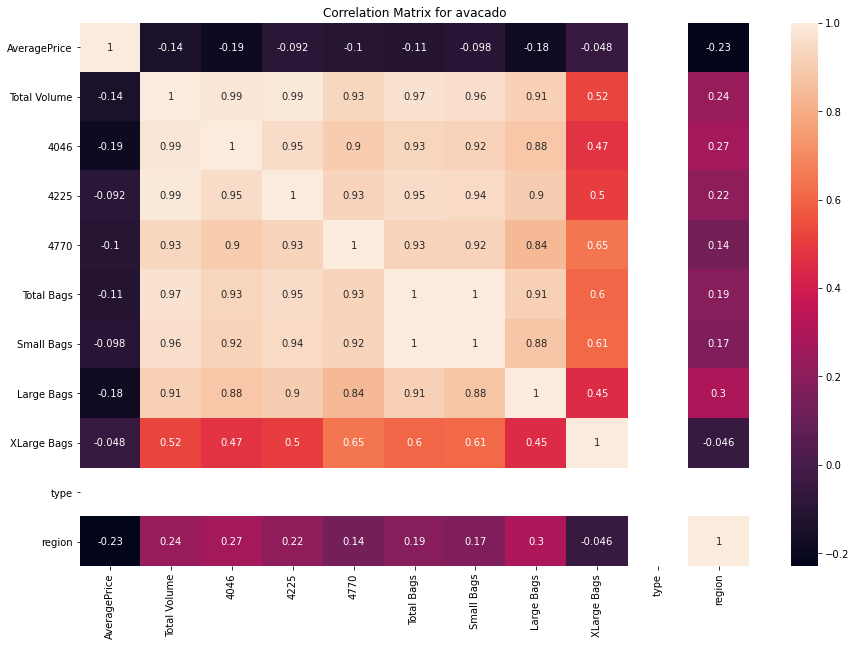

In [125]:
#correlation matrix to find correlation amoung the columns
correlation = df_avacado.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix for avacado")
plt.show()

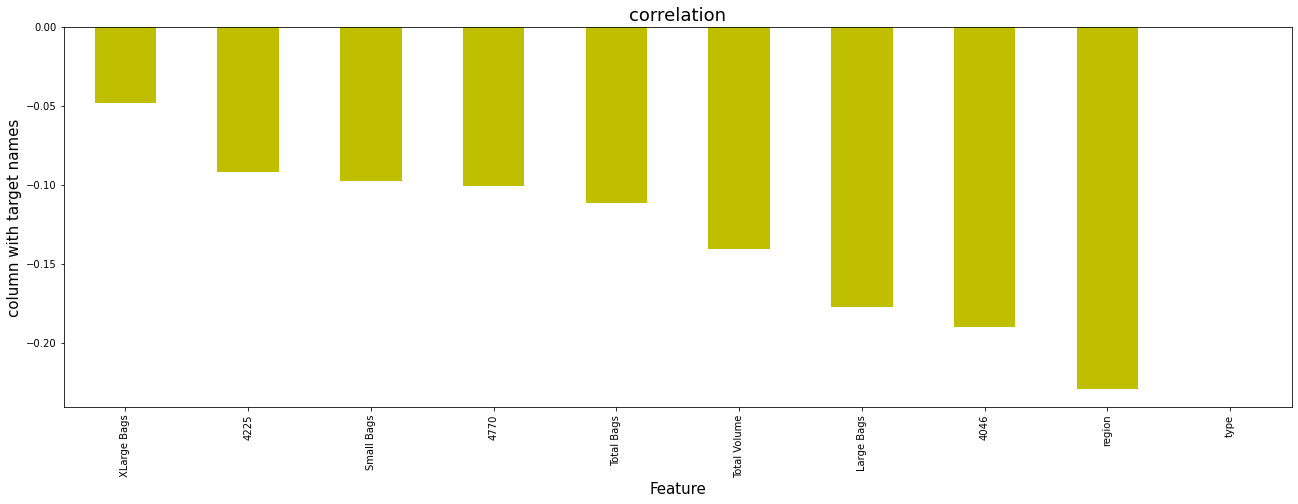

In [128]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
df_avacado.corr()["AveragePrice"].sort_values(ascending = False).drop(["AveragePrice"]).plot(kind = "bar", color = "y")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

### observation:
- All the values are negatively correlated becuse, the average price column values is for per avacado and the other indicate a total of avacados sold
- Type has zero correlation with the target

In [130]:
#correlation with target
correlation["AveragePrice"].sort_values(ascending= False)

AveragePrice    1.000000
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
type                 NaN
Name: AveragePrice, dtype: float64

In [131]:
#converting date to ordinal type for prediction
import datetime as dt
df_avacado["Date"] = df_avacado["Date"].map(dt.datetime.toordinal)

In [132]:
#check the datatype
df_avacado.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
dtype: object

In [133]:
#check the column names
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [135]:
#check the column shape
df_avacado.shape

(1517, 12)

In [136]:
#checbk first 5 records
df_avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,735761,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


-  Date column is coverted to ordinal date

In [137]:
#Final check for null values
df_avacado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

- Considering type to be in no correlation with average price, it is droo[[ed]]

In [138]:
#drop column type
df_avacado = df_avacado.drop("type", axis=1)

# Check for skewness and Removal

#### Normal distribution check

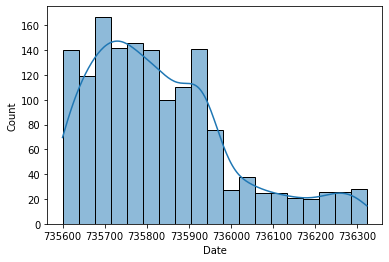

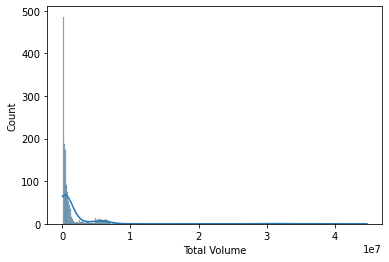

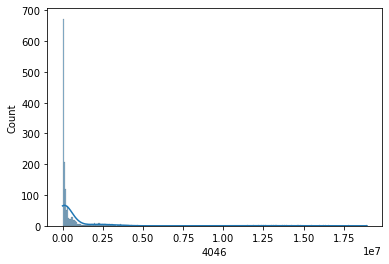

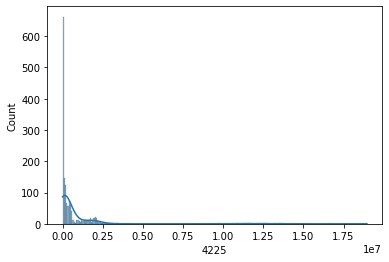

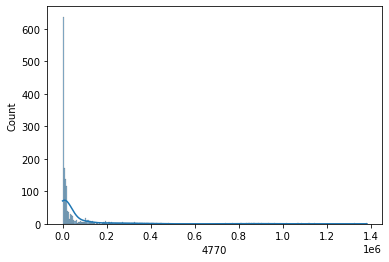

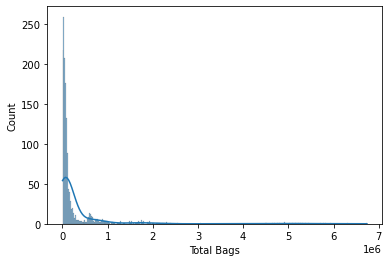

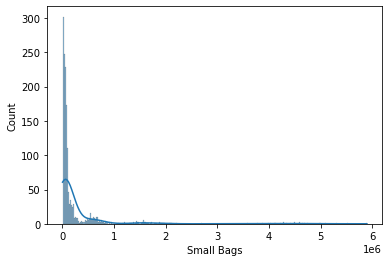

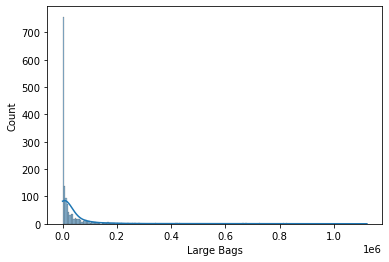

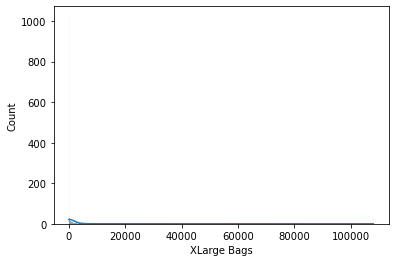

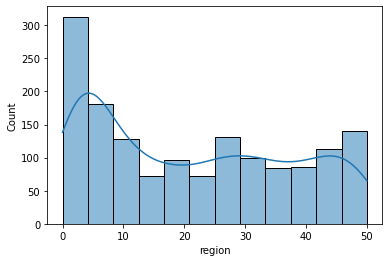

In [139]:
#histplot to check the normal distribution
columns = ['Date', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'region']
for values in columns:
    sns.histplot(data = df_avacado, x=values, kde=True)
    plt.show()

### observation:
   #### date:
    - The date column is left skewed
   #### Total volume:
    - Left skewed
   #### Rest of the columns are left skewed
- perform power transformation to remove skewness


In [142]:
#shuffle the dataset to avoid biased score prediction 
df_avacado = df_avacado.sample(frac=1, random_state = 0)

# Separate independent and target variables

In [144]:
#independent and dependent variable split
x = df_avacado.drop("AveragePrice", axis=1)
y = df_avacado["AveragePrice"]

In [145]:
#check for skewness in independent variable
x.skew()

Date            0.923615
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [146]:
#import power_transform
from sklearn.preprocessing import power_transform

#intialize
avacado_new = power_transform(x)

#create the new dataframe
avacado_new = pd.DataFrame(avacado_new, columns = x.columns)

In [147]:
#check for skewness
avacado_new.skew()

Date            0.922547
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
region         -0.209568
dtype: float64

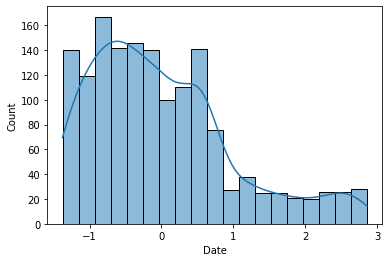

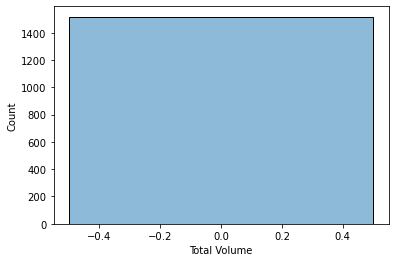

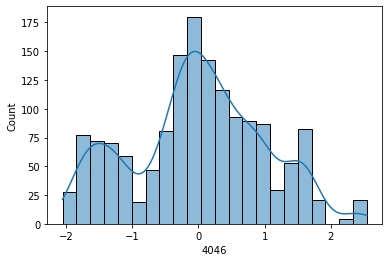

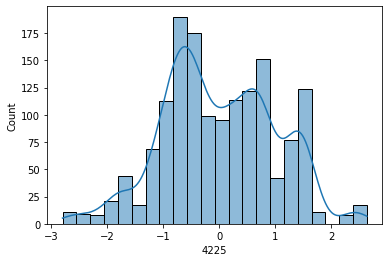

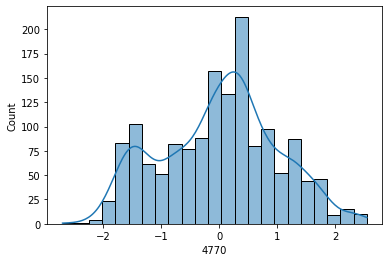

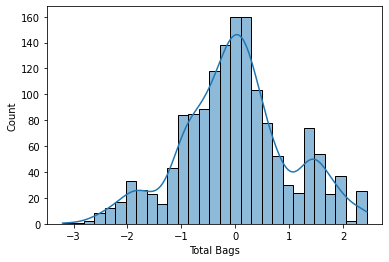

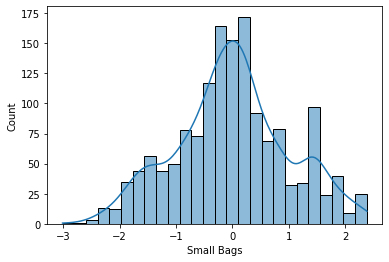

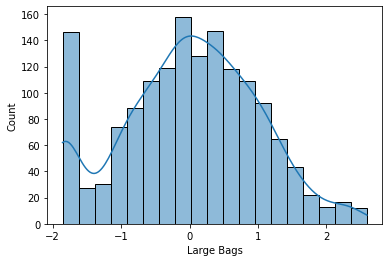

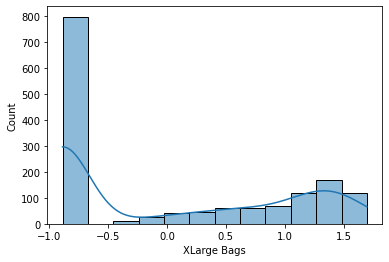

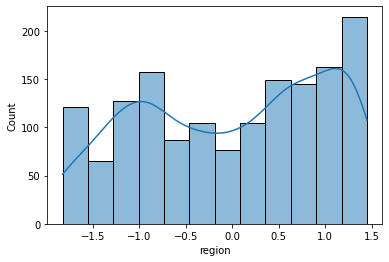

In [148]:
#skewness removed
columns = ['Date', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 
       'region']
for values in columns:
    sns.histplot(data = avacado_new, x=values, kde=True)
    plt.show()

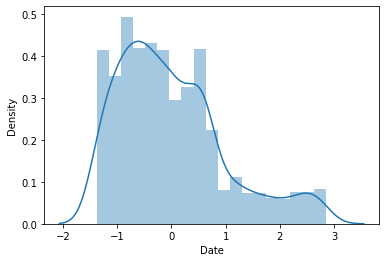

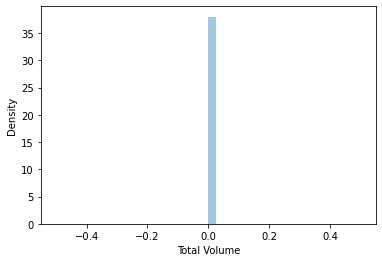

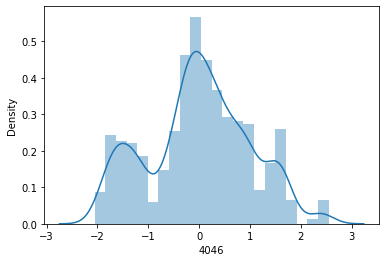

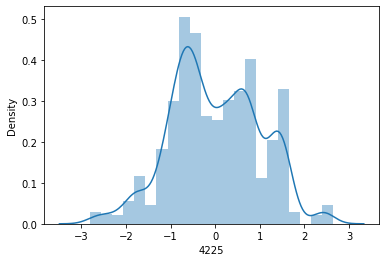

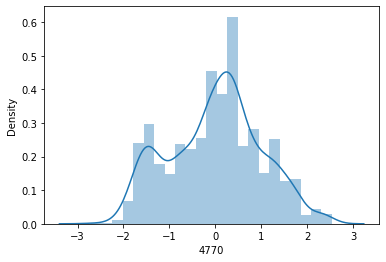

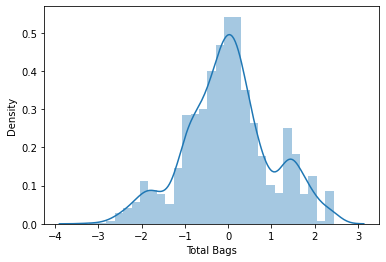

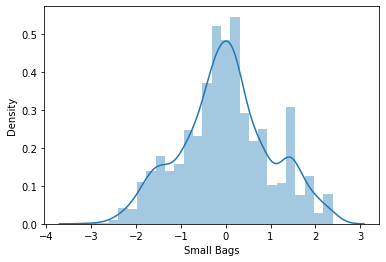

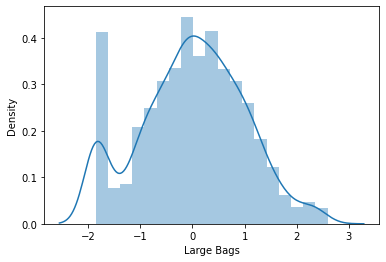

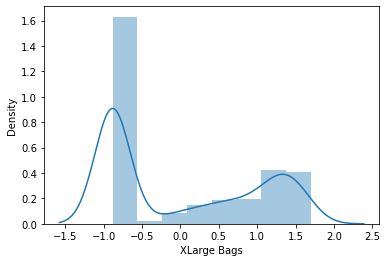

KeyError: 'type'

In [149]:
columns = ['Date', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region']
for values in columns:
    sns.distplot(avacado_new[values], kde=True)
    plt.show()

#### skewness removed

In [150]:
# reassigning. x
x = avacado_new

# Check for Outlier and Removal

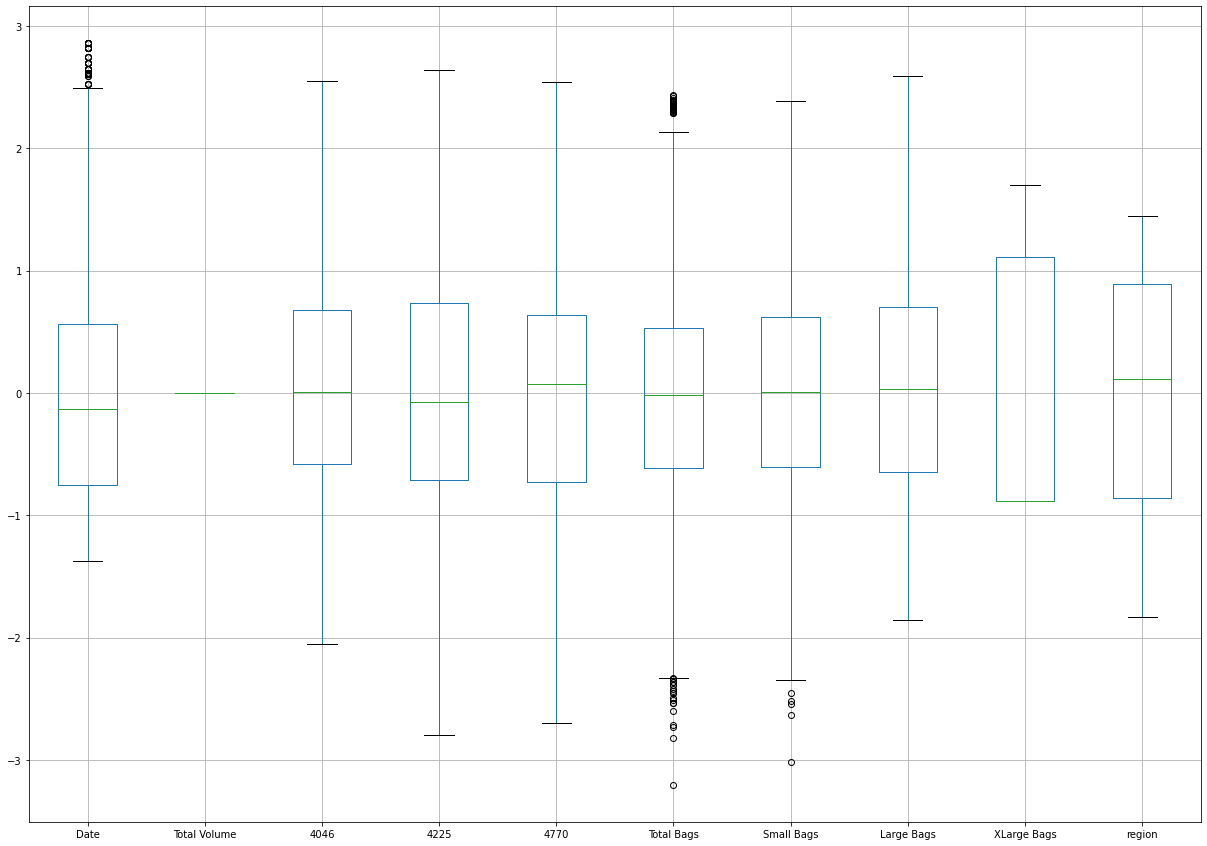

In [151]:
# plotin box plot for the attribute
x.boxplot(figsize = [21,15])
plt.show()

- outlier present in the dataset

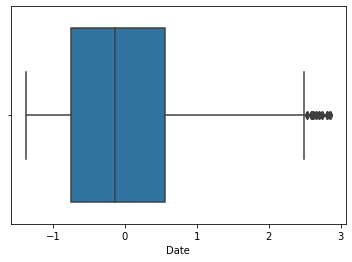

In [152]:
sns.boxplot(x = x["Date"])

##### regplot to identify the linear relationship

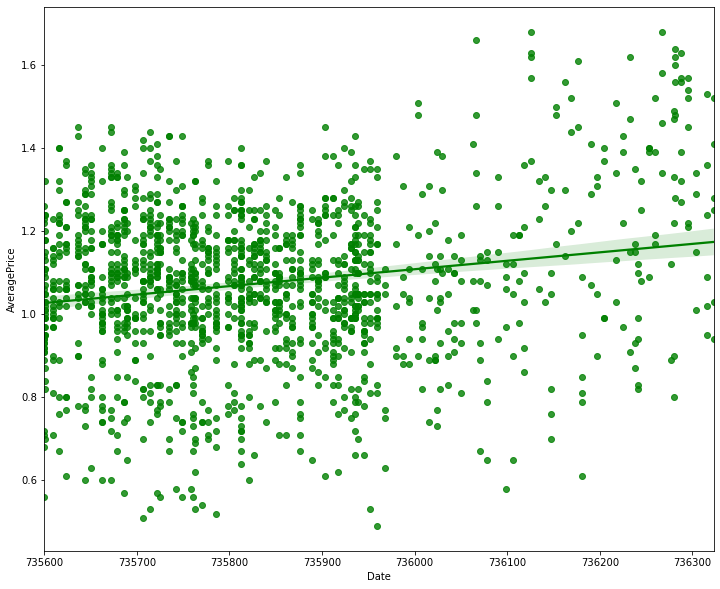

In [155]:
#regplot for date and average price
fig, ax = plt.subplots(figsize = (12,10))
sns.regplot(x = "Date", y="AveragePrice", data = df_avacado, color="g")

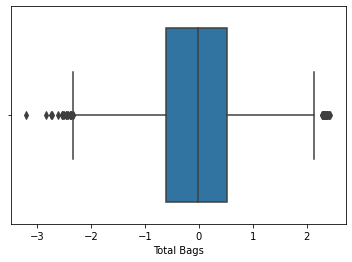

In [156]:
sns.boxplot(x = x["Total Bags"])

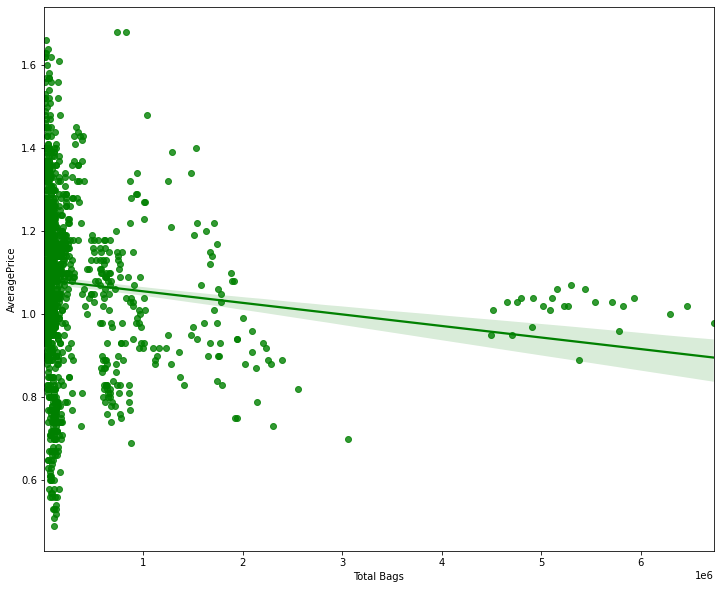

In [157]:
fig, ax = plt.subplots(figsize = (12,10))
sns.regplot(x = "Total Bags", y="AveragePrice", data = df_avacado, color="g")

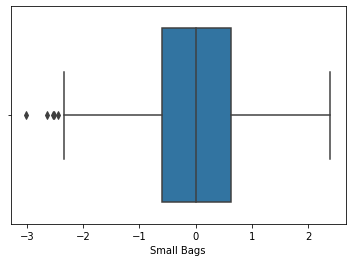

In [158]:
sns.boxplot(x = x["Small Bags"])

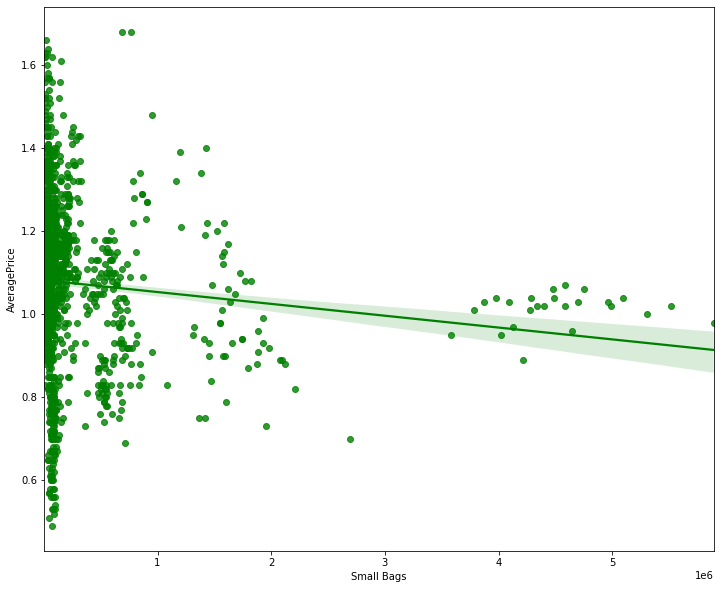

In [159]:
fig, ax = plt.subplots(figsize = (12,10))
sns.regplot(x = "Small Bags", y="AveragePrice", data = df_avacado, color="g")

- when the outliers were removed using z-score there was a high percentage of dataloss, hence the outliers are not removed

# scaling

###### There was huge difference in the range for some columns in the dataset, this might result n biases toward certian columns thus, leading to a incorrect prediction. 
###### Scaling the data will reduce the biased error

In [160]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

new = scale.fit(x)
new_model = new.transform(x)

#scaled 


- The data is scaled

In [161]:
#reassigning x
x = new_model

# Find the best-random state

In [164]:
## finding the best random state
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    RFR = RandomForestRegressor(n_estimators=100)
    RFR.fit(x_train,y_train)
    predf = RFR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8520420382814796  on Random State  99


# Train Test split

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 99)

In [191]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1213, 10)
(1213,)
(304, 10)
(304,)


# Finding the best Algorithm

In [166]:
#RandomforestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

0.8536810345056682
error
Mean absolute error:  0.053332236842105286
Mean squared error:  0.005135509276315793
Root Mean Squared Error:  0.07166246769624804


In [167]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr = DTR.predict(x_test)
print(r2_score(y_test,preddtr))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

0.7411855214760468
error
Mean absolute error:  0.06805921052631579
Mean squared error:  0.009083881578947368
Root Mean Squared Error:  0.09530939921617053


In [169]:
import xgboost as xg

xgreg =  xg.XGBRegressor(objective = 'reg:squarederror', n_estimators=100, seed=123)
xgreg.fit(x_train,y_train)
predxg = xgreg.predict(x_test)
print(r2_score(y_test,predxg))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predxg))
print("Mean squared error: ", mean_squared_error(y_test,predxg))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predxg)))

0.8710779063161767
error
Mean absolute error:  0.04701593158276457
Mean squared error:  0.004524913129330295
Root Mean Squared Error:  0.06726747452766675


In [170]:
from sklearn.model_selection import cross_val_score
rf_scr = cross_val_score(RFR, x, y, cv=8)
print("The cross validation score of Random Forest regression model :", rf_scr.mean())

The cross validation score of Random Forest regression model : 0.813202387953434


In [171]:
from sklearn.model_selection import cross_val_score
dt_scr = cross_val_score(DTR, x, y, cv=8)
print("The cross validation score of Decision Tree regression model :", dt_scr.mean())

The cross validation score of Random Forest regression model : 0.623468377868916


In [173]:
from sklearn.model_selection import cross_val_score
xg_scr = cross_val_score(xgreg, x, y, cv=8)
print("The cross validation score of XGB regression model :", xg_scr.mean())

The cross validation score of Random Forest regression model : 0.8140472360575963


#### calculating th difference to find the best algorithm

In [175]:
diff = round((r2_score(y_test, predrfr))*100) - round((rf_scr.mean())*100)
print("The difference for random forest is: " , diff )

The difference for random forest is:  4.0


In [176]:
diff = round((r2_score(y_test, preddtr))*100) - round((dt_scr.mean())*100)
print("The difference decision tree is: " , diff )

The difference decision tree is:  12.0


In [178]:
diff = round((r2_score(y_test, predxg))*100) - round((xg_scr.mean())*100)
print("The difference for XGB is : " , diff )

The difference for XGB is :  6.0


### Observation:
- Considering Random forest regressor to be the best algorithm with the smallest differnce value between actual pedicted score and cross validation score
- 85% in actual prediction
- 81% in cross validation


# Hyper parameter tuning

In [179]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth': np.arange(2,20), 'max_features': ['auto', 'log2'], 'n_estimators': [100] }

In [180]:
RCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [100]})

In [181]:
RCV.best_params_

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 16}

In [182]:
RCV_pred = RCV.best_estimator_.predict(x_test)

In [183]:
r2_score(y_test, RCV_pred)

0.8472590588540541

# Saving the model

In [184]:
import joblib
joblib.dump(RCV.best_estimator_, "AvacadoRFR.obj")

['AvacadoRFR.obj']

In [185]:
import pickle

filename = 'AvacadoRFR.obj'
pickle.dump(DTR,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1.39, 1.15, 1.18, 1.19, 1.28, 1.25, 0.92, 0.7 , 1.25, 1.1 , 1.19,
       0.71, 1.28, 0.97, 1.1 , 1.19, 1.02, 1.07, 1.1 , 1.14, 1.14, 1.3 ,
       0.75, 0.96, 0.88, 0.74, 1.37, 1.15, 1.12, 1.23, 0.93, 1.1 , 1.13,
       0.86, 0.98, 1.05, 1.08, 0.96, 1.23, 1.25, 1.18, 0.77, 1.02, 1.18,
       1.39, 0.73, 0.7 , 1.2 , 1.32, 0.71, 0.81, 1.15, 1.06, 1.12, 1.28,
       1.11, 0.76, 1.07, 1.27, 0.61, 0.79, 1.17, 0.92, 1.03, 0.84, 1.28,
       0.83, 0.79, 1.37, 1.07, 1.1 , 1.18, 1.51, 1.02, 1.4 , 1.15, 0.95,
       0.99, 0.97, 1.11, 1.03, 0.93, 0.56, 1.07, 1.07, 0.97, 0.96, 0.89,
       0.88, 1.05, 0.98, 0.99, 1.31, 1.12, 1.02, 1.04, 1.03, 1.52, 1.03,
       1.22, 1.11, 1.18, 0.72, 1.11, 1.05, 1.26, 0.87, 0.98, 0.76, 0.94,
       1.25, 0.96, 1.07, 1.14, 1.24, 1.06, 1.29, 1.07, 1.19, 0.86, 0.93,
       0.97, 0.57, 1.41, 0.79, 1.44, 0.99, 1.06, 1.22, 1.08, 1.04, 1.07,
       1.26, 1.06, 1.28, 1.3 , 0.99, 0.71, 0.88, 0.95, 0.74, 1.22, 1.09,
       0.56, 0.96, 0.96, 1.1 , 1.07, 1.43, 0.74, 1.

# Conclusion

In [186]:
# Conclusion
import numpy as np
a = np.array(y_test)
predicted = np.array(predrfr)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))


In [188]:
df_con.head()

,orginal,predicted
0,1.17,1.2396
1,0.97,1.0101
2,1.26,1.2158
3,1.22,1.1943
4,1.17,1.1189


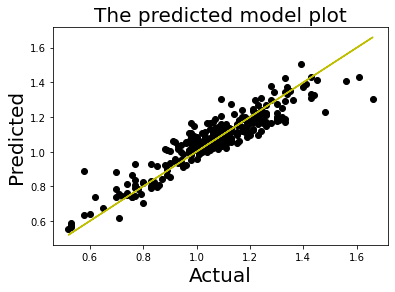

In [190]:

plt.scatter(x=y_test, y=predrfr, color = "black")
plt.plot(y_test,y_test, color='y')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()